In [84]:
import numpy as np
import matplotlib.pyplot as plt
from tensorly.decomposition import parafac, non_negative_parafac

In [94]:
np.random.seed(42)

num_sequences = 100 
num_timesteps = 10 
num_patients = 10 

tensor = np.abs(np.random.normal(0, 0.25, (num_sequences, num_timesteps, num_patients)))

t = np.arange(num_timesteps)
a = 0.3
b = 0.2
c = 0.5

for patient in range(num_patients):
    if patient < 3:
        tensor[0:2, :, patient] = a * t[None, :] + np.abs(np.random.normal(0, 0.25, (2, num_timesteps)))

    elif 3 <= patient < 6: 
        tensor[2:6, :, patient] = b * t[None, :] + np.abs(np.random.normal(0, 0.25, (4, num_timesteps)))

    else:
        for seq in range(1, 5): 
            tensor[seq, :, patient] = np.piecewise(
                t,
                [t <= 5, t > 5],
                [lambda t: c * t, lambda t: -c * (t-5) + c * 5]
            ) + np.abs(np.random.normal(0, 0.25, num_timesteps))

In [35]:
tensor.shape

(100, 10, 10)

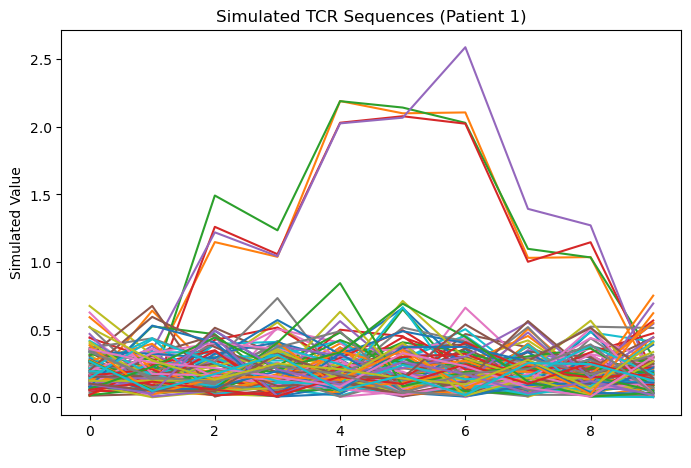

In [97]:
t = np.arange(num_timesteps)

plt.figure(figsize=(8, 5))
for i in range(100):
    plt.plot(t, tensor[i, :, 8])
plt.xlabel("Time Step")
plt.ylabel("Simulated Value")
plt.title("Simulated TCR Sequences (Patient 1)")
plt.show()

In [98]:
sum_per_time_patient = np.sum(tensor, axis=0, keepdims=True)
tensor_normalized = tensor / sum_per_time_patient

In [83]:
def decomposition_visualization(factors, patients):
    factor_labels = ["T Cells", "Days", "Patients"]
    x_labels = [range(f.shape[0]) for f in factors]
    
    num_components = factors[0].shape[1]
    
    fig, axes = plt.subplots(num_components, 3, figsize=(15, 4 * num_components))
    
    for component in range(num_components):
        for dim in range(3):
            ax = axes[component, dim]
            if dim == 0 or dim == 2:
                ax.bar(x_labels[dim], factors[dim][:, component], color='royalblue', alpha=0.8)
            else:
                ax.plot(x_labels[dim], factors[dim][:, component], marker='o', linestyle='-')
            ax.set_title(f"Component {component+1} - {factor_labels[dim]}")
            ax.set_xlabel(factor_labels[dim])
            ax.set_ylabel("Weight")
            if dim == 1:
                time_labels = [t * 10 for t in x_labels[dim]]
                ax.set_xticks(x_labels[dim])
                ax.set_xticklabels(time_labels)
                if len(time_labels) > 29:
                    step = 6
                elif len(time_labels) > 19:
                    step = 4
                elif len(time_labels) > 9:
                    step = 2 
                else:
                    step = 1 
                
                ax.set_xticks(x_labels[dim][::step])  # Reduce number of ticks
                ax.set_xticklabels(time_labels[::step]) 
            if dim == 2:
                ax.set_xticks(range(len(patients)))
                ax.set_xticklabels(patients, rotation=45, ha="right")
    
    plt.tight_layout()
    plt.show()

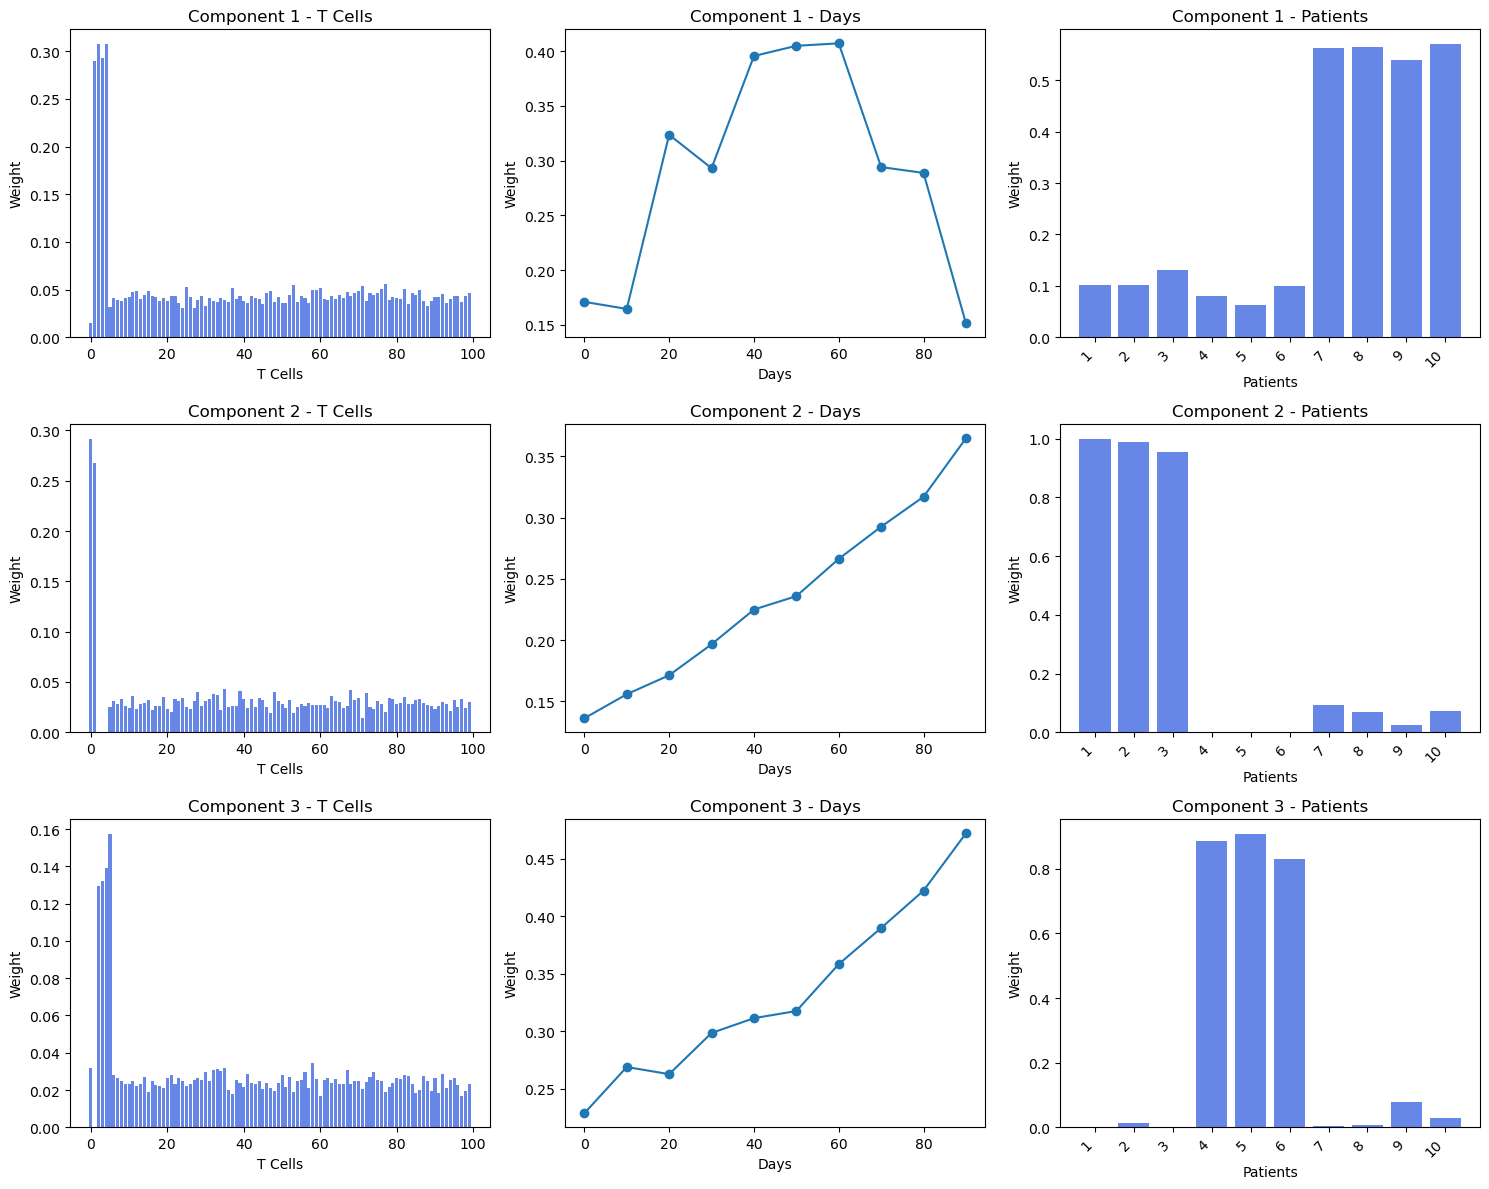

In [99]:
tensor_normalized = tl.tensor(tensor_normalized)
weights, factors = non_negative_parafac(tensor_normalized, rank=3, normalize_factors=False)
patients = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
decomposition_visualization(factors, patients)